In [3]:
import pandas as pd

In [6]:
df = pd.read_csv('tetris2.csv')

In [12]:
df.head()


,ID,condition,score
0,1,auditory,76
1,2,auditory,68
2,3,auditory,45
3,4,auditory,44
4,5,auditory,69


In [13]:
print(df.dtypes)

ID            int64
condition    object
score         int64
dtype: object


In [14]:
df.tail()

,ID,condition,score
59,60,visual,33
60,61,visual,55
61,62,visual,38
62,63,visual,52
63,64,visual,31


In [15]:
#making two seperate dataframes
df_auditory = df.loc[df['condition'] == 'auditory']
df_visual = df.loc[df['condition'] == 'visual']

In [18]:
df_auditory.describe()

,ID,score
count,32.000000,32.000000
mean,24.500000,67.937500
std,16.917256,11.053937
min,1.000000,44.000000
25%,8.750000,60.000000
50%,24.500000,69.000000
75%,40.250000,76.000000
max,48.000000,87.000000


In [19]:
df_visual.describe()

,ID,score
count,32.000000,32.000000
mean,40.500000,46.625000
std,16.917256,11.801449
min,17.000000,29.000000
25%,24.750000,37.750000
50%,40.500000,46.000000
75%,56.250000,52.500000
max,64.000000,74.000000


In [20]:
df.describe()

,ID,score
count,64.000000,64.000000
mean,32.500000,57.281250
std,18.618987,15.620976
min,1.000000,29.000000
25%,16.750000,44.750000
50%,32.500000,57.000000
75%,48.250000,69.500000
max,64.000000,87.000000


In [21]:
#the dataframe has now been split into two seperate dataframes, one containing all the 'visual' participants and 
#one containing all the 'auditory' participants 

In [22]:
#checking for outliers that lie outside the range of plus or minus 3 standard deviations

In [36]:
meanA = df_auditory['score'].mean()
stdA = df_auditory['score'].std()
Aoutliers = df[(df_auditory['score'] < meanA - 3*stdA) | (df['score'] > meanA + 3*stdA)]

In [33]:
print(Aoutliers)

Empty DataFrame
Columns: [ID, condition, score]
Index: []


In [34]:
#no outliers for auditory score

In [37]:
meanV = df_visual['score'].mean()
stdV = df_visual['score'].std()
Voutliers = df[(df_visual['score'] < meanV - 3*stdV) | (df['score'] > meanV + 3*stdV)]

In [38]:
print(Voutliers)

Empty DataFrame
Columns: [ID, condition, score]
Index: []


In [39]:
#no outliers found
#making some boxplots

In [40]:
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

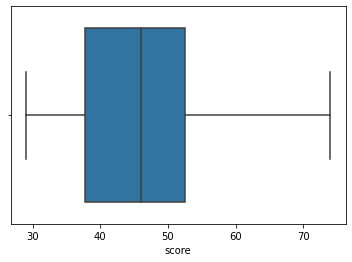

In [41]:
sns.boxplot(df_visual['score'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

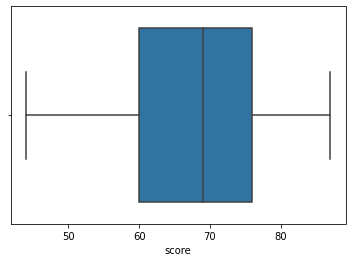

In [42]:
sns.boxplot(df_auditory['score'])

In [43]:
#boxplots look good and without any outliers

In [44]:
#checking histograms

<AxesSubplot:xlabel='score', ylabel='Count'>

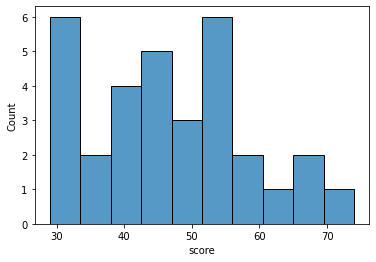

In [50]:
sns.histplot(df_visual['score'], bins = 10)

<AxesSubplot:xlabel='score', ylabel='Count'>

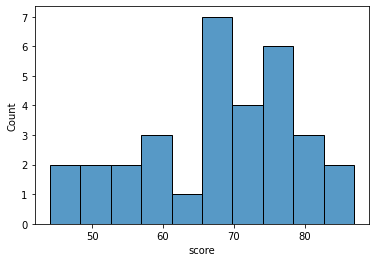

In [49]:
sns.histplot(df_auditory['score'], bins = 10)

In [51]:
#both look relatively normally distributed, but means appear different. Now to carry out a T-test
# need to test for normal distribution and homogenietty of variance

In [52]:
# shapiro wilks test to test for normaa dist

In [57]:
from scipy.stats import shapiro

visual_score_p = shapiro(df_visual['score'])
auditory_score_p = shapiro(df_auditory['score'])

In [58]:
print(visual_score_p)

ShapiroResult(statistic=0.963798999786377, pvalue=0.34769004583358765)


In [59]:
# p-value of 0.348 > 0.05 - NORMALLY DISTRIBUTED

In [60]:
print(auditory_score_p)

ShapiroResult(statistic=0.9521842002868652, pvalue=0.16621069610118866)


In [61]:
# p-value of 0.166 > 0.05 - NORMALLY DISTRIBUTED

In [62]:
#levens test t ocheck for homogeniety of variance 

In [63]:
from scipy.stats import levene

auditory_scores = df_auditory['score']
visual_scores = df_visual['score']

levene_test_result = levene(auditory_scores, visual_scores)

In [64]:
print(levene_test_result)

LeveneResult(statistic=0.37480650964314105, pvalue=0.5426347247026557)


In [65]:
# p -value = 0.543 > 0.05 - ACCEPT EQUAL VARIANCE

In [67]:
# can now run our INDEPENDENT T-TEST

from scipy.stats import ttest_ind

auditory_scores = df_auditory['score']
visual_scores = df_visual['score']

t_test_result = ttest_ind(auditory_scores, visual_scores)

In [68]:
print(t_test_result)

Ttest_indResult(statistic=7.455961831977524, pvalue=3.482631464537382e-10)


In [69]:
print(meanA)

67.9375


In [70]:
print(meanV)

46.625


In [71]:
# the mean of auditory score is 67.9. The mean of visual is 46.6. There is a statistically significant difference
# between the means to the level of p <0.001

<AxesSubplot:xlabel='condition', ylabel='score'>

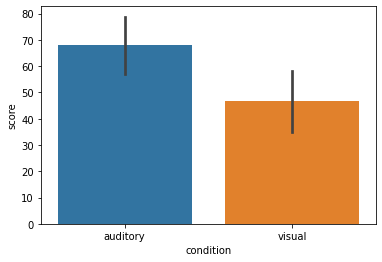

In [72]:
sns.barplot(x = 'condition', y = 'score', data = df, ci = "sd")

In [ ]:
#reasults visualised with barplot including errorbars. 